In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [2]:
from LoadMultiFiles import LoadOneFileUproot
fileNo = 1
options_h_time = ""
v_tags_to_load = ["pES", "eES", "AfterPulse"]
dir_evts = LoadOneFileUproot(f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/PSD/root{options_h_time}/user_PSD_{fileNo}_SN.root",name_branch="evt",         return_list=False)
dir_PSD = LoadOneFileUproot(f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/PSD/root{options_h_time}/user_PSD_{fileNo}_SN.root", name_branch="PSD",         return_list=False)
dir_map = LoadOneFileUproot(f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/tag_event/root/sn_tag_{fileNo}.root", name_branch='evtTruth', return_list=False)
dir_tagAP=LoadOneFileUproot(f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/AfterPulsePrediction/root/TagAfterPulse_{fileNo}.root", name_branch="AfterPulseTag", return_list=False )

In [3]:
import pandas as pd
from DictTools import RenameDict
RenameDict(dir_PSD, key_old="evtType", key_new="evtType_PSD")
dir_PSD.update(dir_evts)
dir_PSD.update(dir_map)
dir_PSD.update(dir_tagAP)

In [4]:
df_PSD = pd.DataFrame.from_dict( dir_PSD )
df_PSD["evtType_PSD"] = df_PSD["evtType_PSD"].replace({1:"Electron", 2:"Proton"})
df_PSD


,psdVal,evtType_PSD,evtID,h_time_without_charge,h_time_with_charge,XYZ,Erec,evtID_PSD,nuE,evtType,...,TriggerTimeInterval,fileNo,detID,detIDs,entryCalib,entryGen,TotalCharge_lastEvt,TriggerTimeIntervalWithFilter,TotalCharge,TagAP
0,0.999750,Electron,0,"[11.0, 21.0, 104.0, 221.0, 422.0, 595.0, 861.0...","[55.40575179462661, 174.9042806992965, 776.240...","[3690.23291015625, 9668.5791015625, -9107.5136...",17.190582,0,21.365711,C12,...,0.0,1,0,[0],0,500,0.000000,1000.000,29110.722773,0
1,0.068216,Proton,1,"[13.0, 44.0, 92.0, 226.0, 362.0, 539.0, 905.0,...","[58.20763595968533, 148.62835720846783, 543.19...","[-3299.3994140625, 11339.15625, -7723.5751953125]",13.429245,1,11.001824,IBD,...,78708.0,1,1,[1],1,501,0.000000,1000.000,23440.364255,0
2,0.999453,Electron,2,"[7.0, 27.0, 53.0, 114.0, 171.0, 293.0, 452.0, ...","[528.1690077869208, 1934.94372821635, 2465.093...","[-16777.076171875, -305.09228515625, 2982.5566...",23.613026,2,22.242191,IBDp,...,9408.0,1,2,[2],2,502,0.000000,1000.000,38021.317716,0
3,0.030228,Proton,3,"[12.0, 34.0, 65.0, 130.0, 199.0, 351.0, 372.0,...","[31.51430666984004, 53.67805346106438, 99.3271...","[3121.460205078125, 9520.7646484375, -4120.497...",3.514113,3,71.710789,pES,...,11728.0,1,3,[3],3,503,0.000000,1000.000,6213.532409,0
4,0.996323,Electron,4,"[18.0, 54.0, 119.0, 272.0, 512.0, 735.0, 1310....","[45.65699749156888, 152.67331252187523, 328.93...","[6615.75, 1811.9674072265625, 3335.962890625]",16.555046,4,15.611119,IBDp,...,109092.0,1,4,[4],4,504,0.000000,1000.000,25916.581038,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18529,0.976175,Electron,18529,"[3.0, 2.0, 6.0, 22.0, 51.0, 95.0, 134.0, 210.0...","[2.8851881153437606, 6.477300129835198, 34.054...","[-13297.494140625, 6865.60791015625, -6640.290...",2.464841,18529,33.577723,IBDd,...,20480.0,28,74,[74],88,14074,64736.867739,22.306,4401.568901,0
18530,0.997262,Electron,18530,"[11.0, 29.0, 91.0, 227.0, 383.0, 575.0, 959.0,...","[36.22857414210503, 88.69462689459502, 256.683...","[1901.5828857421875, -6774.83642578125, 7680.4...",12.511582,18530,11.972034,IBDp,...,10100736.0,28,75,[75],89,14075,0.000000,1000.000,20120.350200,0
18531,0.996280,Electron,18531,"[8.0, 20.0, 55.0, 77.0, 137.0, 222.0, 355.0, 3...","[8.226434717003361, 32.313741983482586, 73.835...","[1820.373291015625, -6896.296875, 7963.1821289...",2.469290,18531,11.972034,IBDd,...,202752.0,28,75,[75],90,14075,0.000000,1000.000,4306.374600,0
18532,0.996495,Electron,18532,"[24.0, 83.0, 157.0, 387.0, 663.0, 980.0, 1479....","[65.54843458955489, 297.2913999043069, 598.411...","[6769.12060546875, 1396.4952392578125, -7211.1...",18.411425,18532,17.233939,IBDp,...,1071104.0,28,76,[76],91,14076,0.000000,1000.000,29213.379952,0


# PSD Value Distribution

Text(0.5, 1.0, 'PSD Variables Distribution')

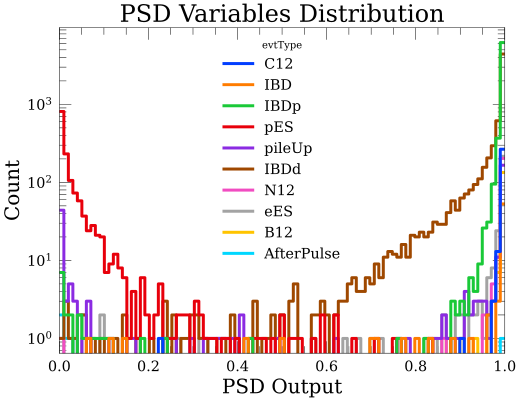

In [5]:
import seaborn as sns
sns.histplot(x="psdVal", data=df_PSD[df_PSD["TagAP"]==0], hue="evtType", fill=False, element="step",palette="bright",
             bins=np.linspace(0,1,100))
plt.xlim(0,1)
plt.semilogy()
plt.xlabel("PSD Output")
plt.title("PSD Variables Distribution")

# Energy Spectrum
## 1. Spectrum After Tagging

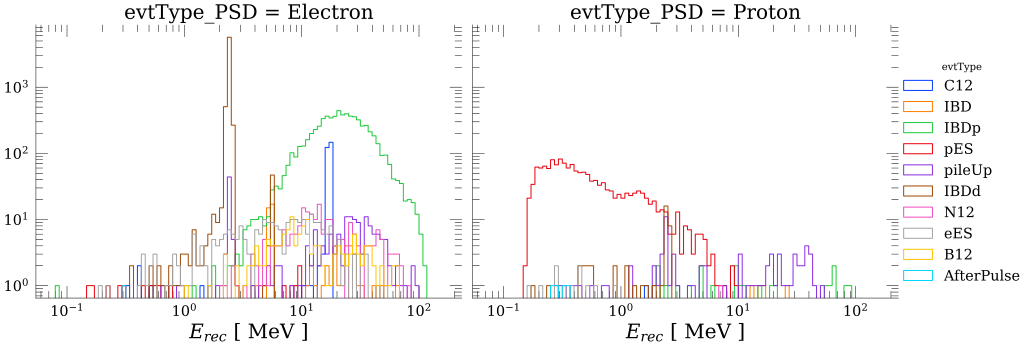

In [6]:
PSD_fg = sns.FacetGrid(df_PSD[df_PSD["TagAP"]==0 ], col="evtType_PSD", hue="evtType",height=5, aspect=1.3,
                       palette="bright" )
PSD_fg.map(plt.hist, "Erec", histtype="step",bins=np.logspace(-1.1,2.2,100))
plt.semilogy()
plt.semilogx()
PSD_fg.add_legend()
# plt.xlabel("$E_{rec}$ [ MeV ]")
PSD_fg.set_axis_labels("$E_{rec}$ [ MeV ]")

## 2. Spectrum Comparison After PSD

0         True
1        False
2        False
3         True
4        False
         ...  
18529    False
18530    False
18531    False
18532    False
18533    False
Name: evtType, Length: 18534, dtype: bool


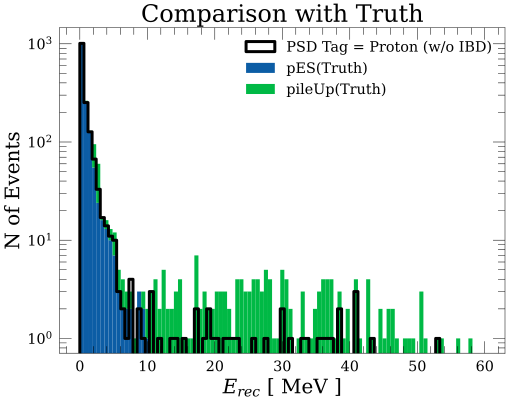

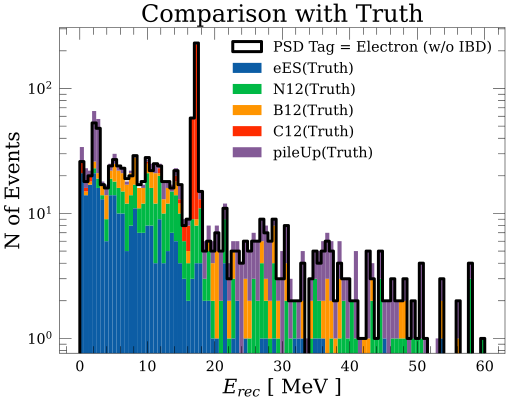

In [7]:
v_options = [("Proton",["pES","pileUp"]), ("Electron", ["eES", "N12", "B12", "C12","pileUp"])]

print(df_PSD["evtType"].apply(lambda x:True if "IBD" not in x else False))

E_bins = np.linspace(0,60, 100)
for option in v_options:
    plt.figure()
    tag, v_tag_truth = option
    plt.hist( df_PSD["Erec"][(df_PSD["evtType_PSD"]==tag) & (df_PSD["TagAP"]==0) & (df_PSD["evtType"].apply(lambda x:True if "IBD" not in x else False))], bins=E_bins,
              histtype="step", label=f"PSD Tag = {tag} (w/o IBD)", color="black", linewidth=3)
    v2d_Erec = []
    v_labels = []
    for tag_truth in v_tag_truth:
        v2d_Erec.append( np.array(df_PSD["Erec"][(df_PSD["evtType"]==tag_truth) ]) )
        v_labels.append(tag_truth+"(Truth)")

    plt.hist( v2d_Erec, bins=E_bins,ls="--", stacked=True, label=v_labels)
    plt.semilogy()
    plt.legend()
    plt.xlabel("$E_{rec}$ [ MeV ]")
    plt.ylabel("N of Events")
    plt.title("Comparison with Truth")


In [8]:
# v_options = [("Proton",["pES","pileUp"]), ("Electron", ["eES", "N12", "B12", "C12","pileUp"])]
#
# E_bins = np.linspace(0,60, 100)
# for option in v_options:
#     plt.figure()
#     tag, v_tag_truth = option
#     plt.hist( df_PSD["Erec"][(df_PSD["evtType_PSD"]==tag) & (df_PSD["TagAP"]==0) & (df_PSD["IBD_Tag"]=="Single")], bins=E_bins,
#               histtype="step", label=f"PSD Tag = {tag}", color="black", linewidth=3)
#     v2d_Erec = []
#     v_labels = []
#     for tag_truth in v_tag_truth:
#         v2d_Erec.append( np.array(df_PSD["Erec"][(df_PSD["evtType"]==tag_truth) ]) )
#         v_labels.append(tag_truth+"(Truth)")
#
#     plt.hist( v2d_Erec, bins=E_bins,ls="--", stacked=True, label=v_labels)
#     plt.semilogy()
#     plt.legend()
#     plt.xlabel("$E_{rec}$ [ MeV ]")
#     plt.ylabel("N of Events")
#     plt.title("Comparison with Truth (With IBD Selection)")

# 3. Efficiency Calculation

In [9]:
from IPython.display import display
# PSD Selection
index_single_event = ((df_PSD["TagAP"]==0) & (df_PSD["IBD_Tag"]=="Single") )
v_PSD_Tags = ["Proton", "Electron"]
v_Title = ["pES", "eES+CC+NC"]
df_residue_components = pd.DataFrame()
for PSD_tag, title in zip( v_PSD_Tags, v_Title ):
    df_temp = df_PSD[ index_single_event & (df_PSD["evtType_PSD"]==PSD_tag) ].groupby("evtType").size().reset_index(name=title).set_index("evtType")
    df_temp[title] = df_temp[title]/ np.sum( df_temp[title] )
    df_residue_components = pd.concat( [df_residue_components,df_temp], axis=1)

# IBD Selection
index_IBD_event = ((df_PSD["TagAP"]==0) & (df_PSD["IBD_Tag"]!="Single") )
title="IBD"
df_temp = df_PSD[ index_IBD_event ].groupby("evtType").size().reset_index(name=title).set_index("evtType")
df_temp[title] = df_temp[title]/ np.sum( df_temp[title] )
df_residue_components = pd.concat( [df_residue_components,df_temp], axis=1)

df_residue_components =  df_residue_components.fillna(0)
df_residue_components*100

KeyError: 'IBD_Tag'

In [ ]:
df_PSD["IBD_Tag"].value_counts()

In [ ]:
from importlib import reload
import AnalysisTools
reload(AnalysisTools)
from AnalysisTools import  PlotTimeProfileAfterCut

bins = np.loadtxt(f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/PSD/Bins_Setting.txt", delimiter=",")
PlotTimeProfileAfterCut(df_PSD, bins=bins ,index_cut=( (df_PSD["evtType_PSD"]=="Proton") ),
                        v_tags=["IBDd", "pES"],key_tag="evtType",divide_bin_width=True, one_plot=True )

# plt.figure()
# PlotTimeProfileAfterCut(df_PSD, bins=bins ,index_cut=( (df_PSD["evtType_PSD"]=="Electron") ),
#                         v_tags=["IBDp", "pES","eES"],key_tag="evtType", divide_bin_width=True, one_plot=True)
# for h_time in df_PSD["h_time_with_charge"][]:
#     print(h_time)
#     break